In [2]:
!pip install missingno

In [3]:
!pip install ycimpute

In [62]:
!pip install statsmodels

In [189]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.7 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.7 MB 819.2 kB/s eta 0:02:02
   ---------------------------------------- 0.2/99.7 MB 985.7 kB/s eta 0:01:42
   ---------------------------------------- 0.3/99.7 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.3/99.7 MB 1.2 MB/s eta 0:01:21
   ---------------------------------------- 0.4/99.7 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.5/99.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.6/99.7 MB 1.4 MB/s eta 0:01:13
   -----------------------

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ycimpute.imputer import knnimput
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('train(1).csv')

In [3]:
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [4]:
df.info('train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
df.isnull().values.any()
#veri setinde eksiklik varmı

False

In [10]:
df[df.isnull().values.any(axis=1)]
#veri setinde eksiklik olan satırları bas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
df.isnull().sum()
#eksiklik varsa nerelerde var

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
df.isnull().sum().sum()
#total eksiklik bulma

0

<Axes: >

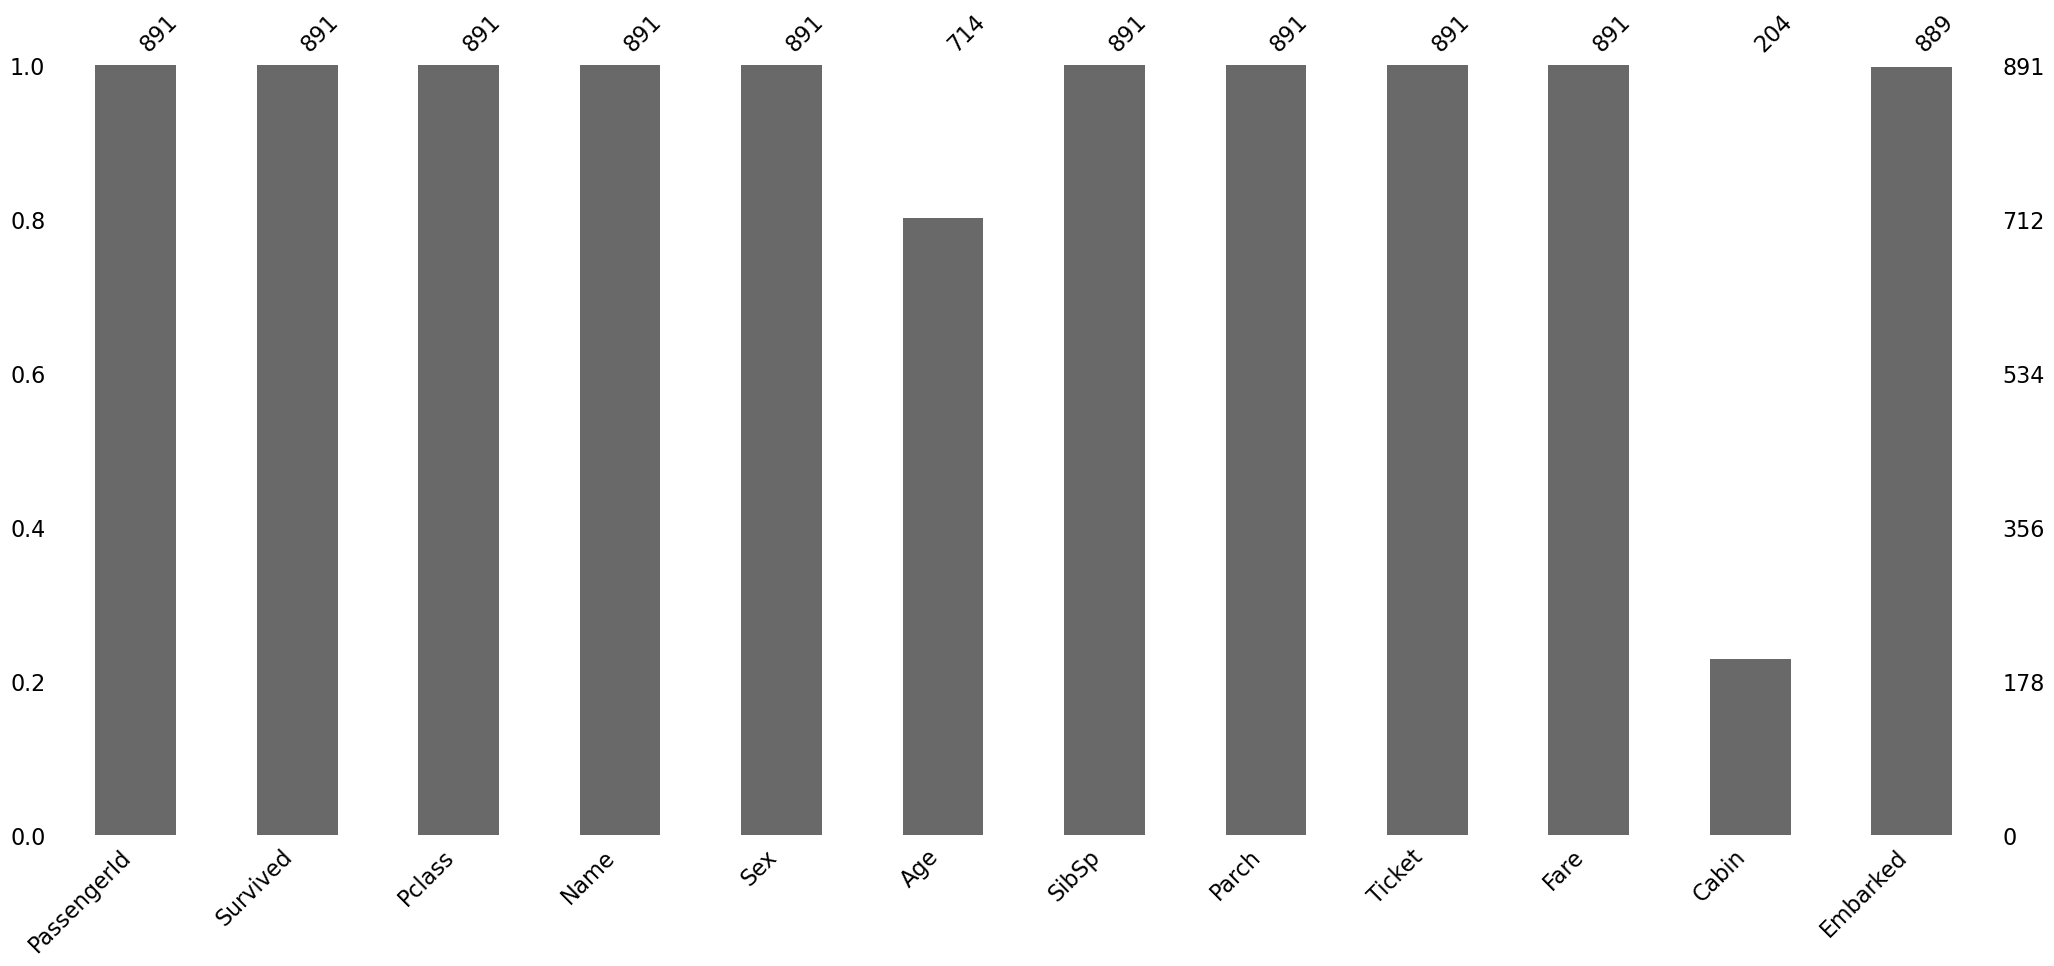

In [13]:
msno.bar(df)

<Axes: >

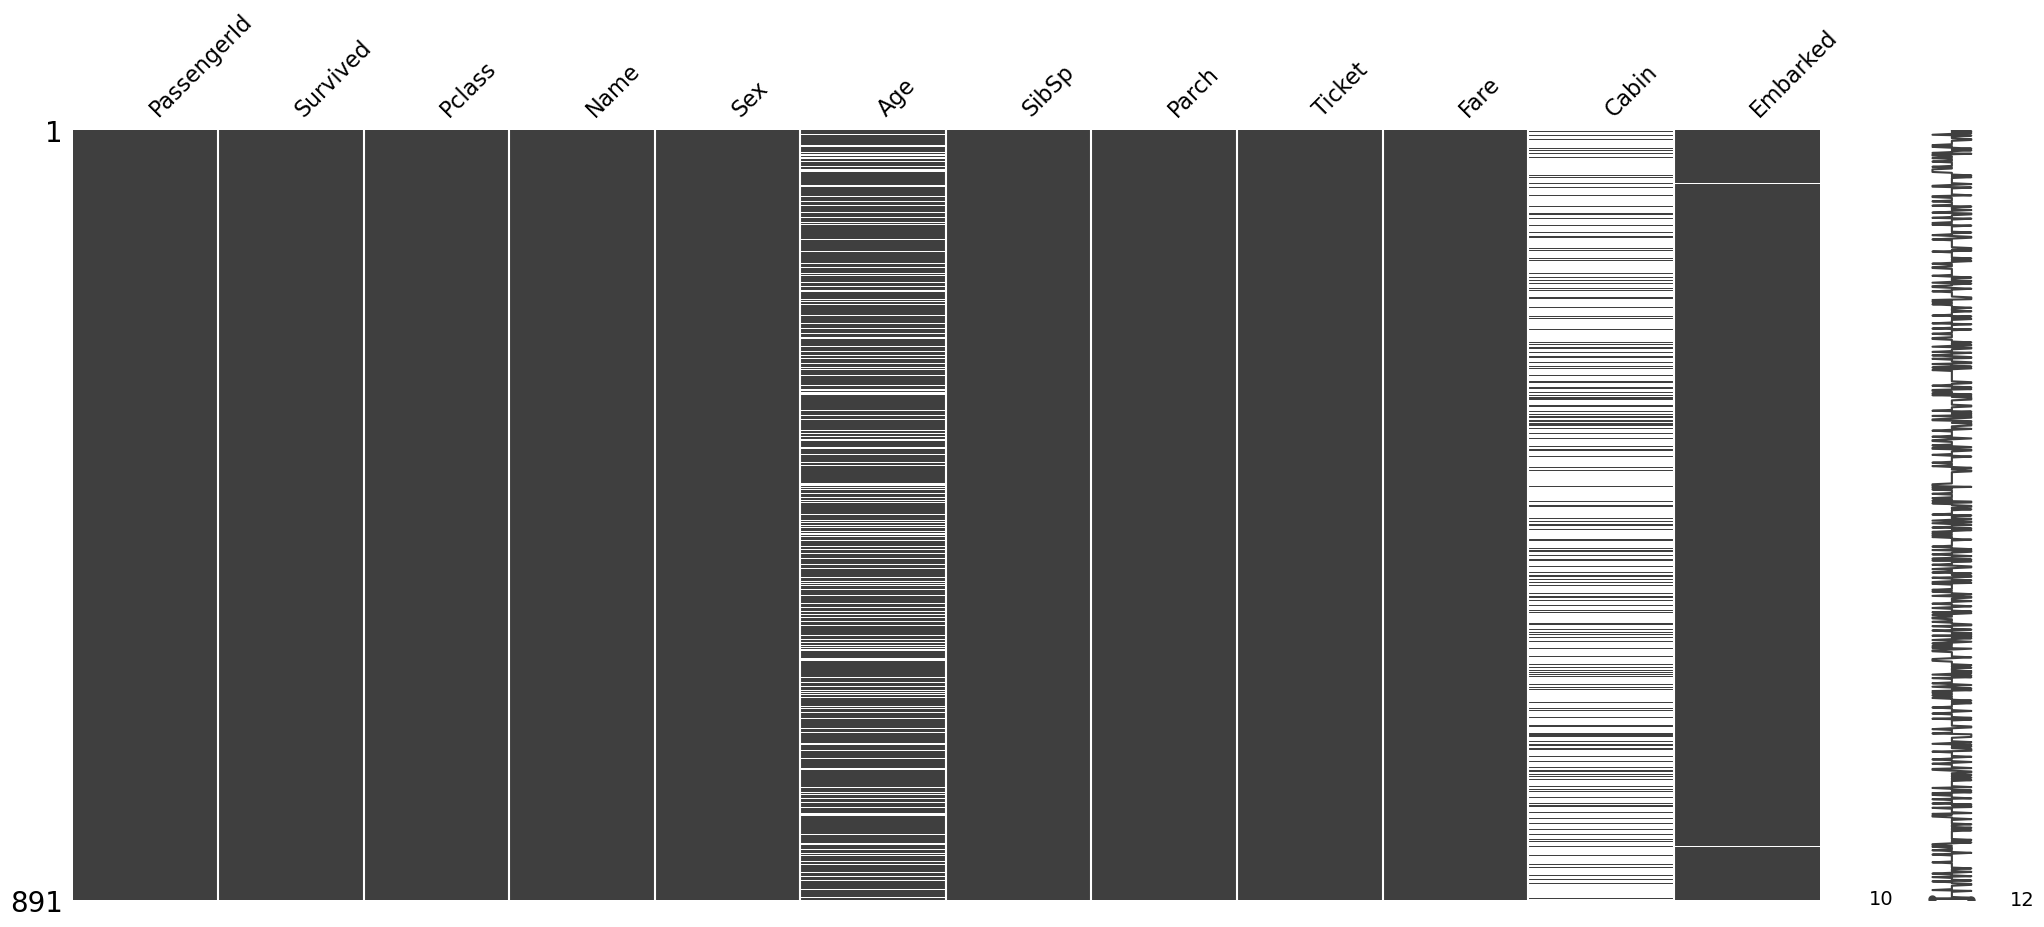

In [14]:
msno.matrix(df)

<Axes: >

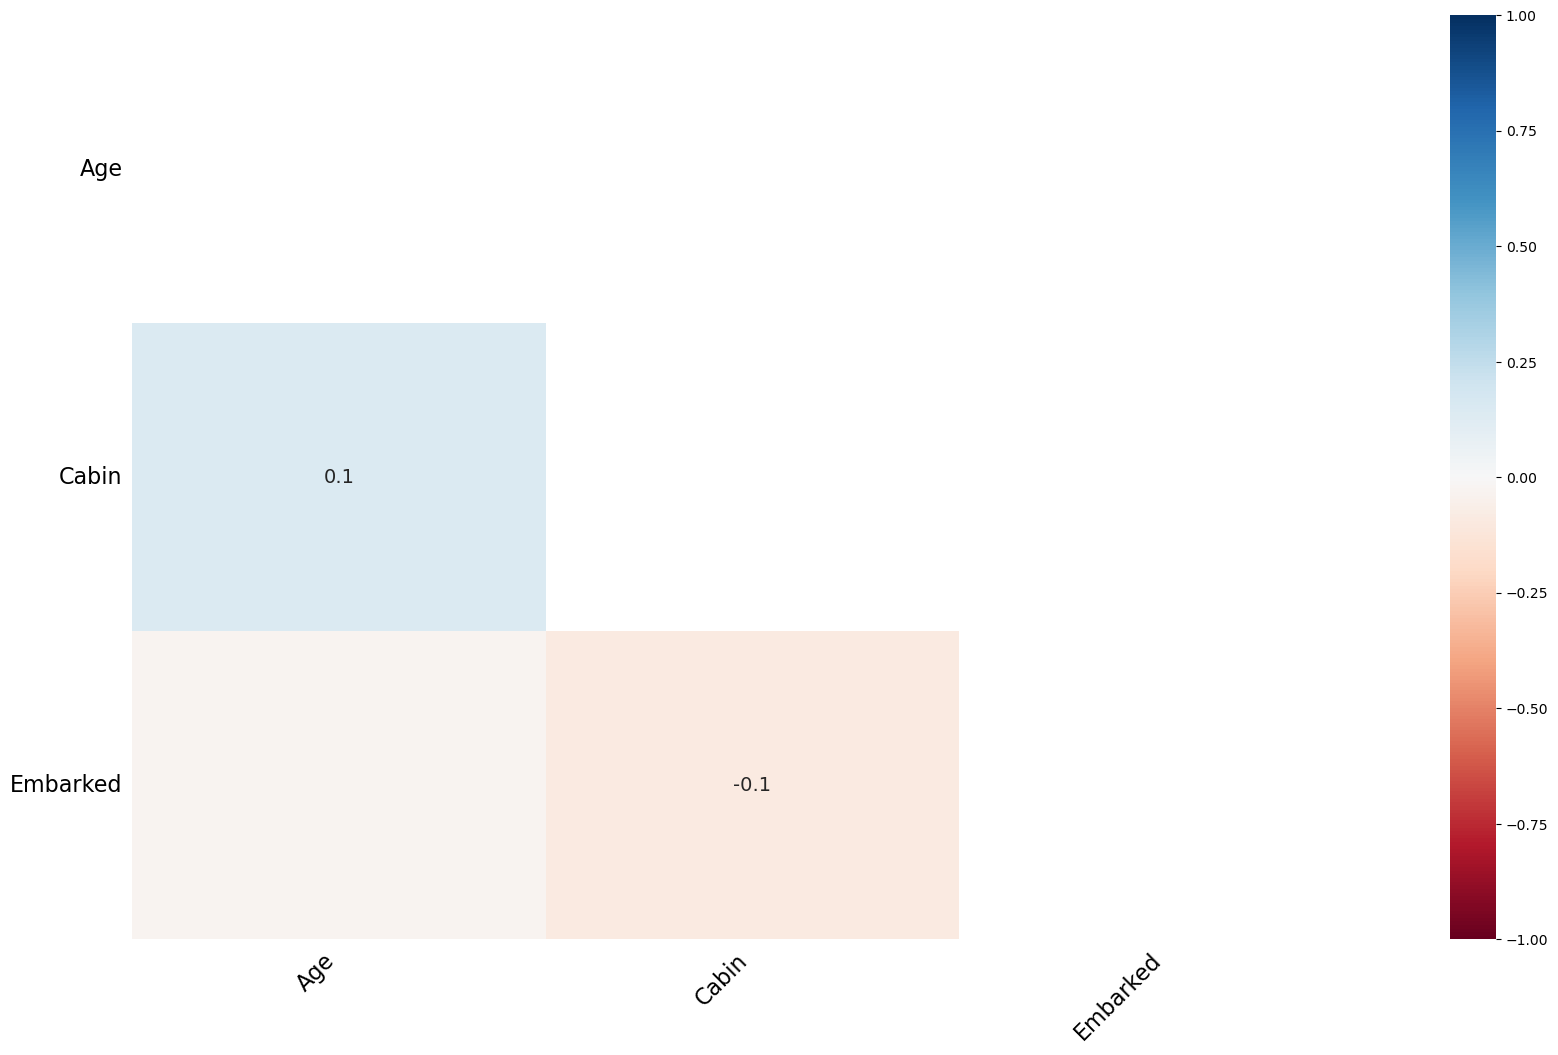

In [15]:
msno.heatmap(df)

In [16]:
df[df.notnull().all(axis=1)]
#her sütun dolu olan, hiç eksik değer bulunmayan veriler

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<Axes: >

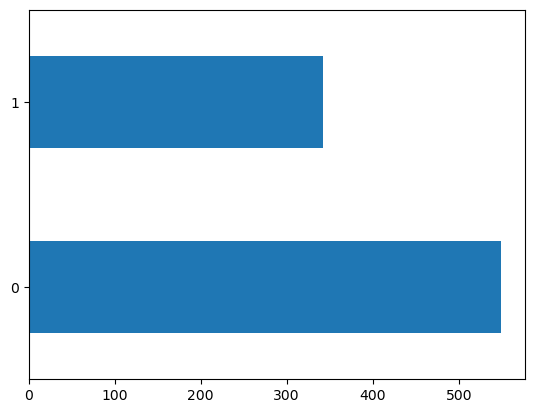

In [17]:
df["Survived"].value_counts().plot.barh() #1 survived

In [276]:
df["Cabin"].fillna(df["Cabin"].mode()[0]) #gerçek değere atamıyor

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [18]:
for colName in df.columns:
    df[colName] = df[colName].fillna(df[colName].value_counts().index[0])
    #eksik değerleri moda göre doldur

In [22]:
#Standardizasyon=makine öğrenmesi algoritmalarının veri setlerini standartlaştırarak, makineyi zorlamayı engelliyor
preprocessing.scale(df["Age"])

array([-0.49779327,  0.71504807, -0.19458293,  0.48764032,  0.48764032,
       -0.3461881 ,  1.9278894 , -2.01384494, -0.11878035, -1.10421394,
       -1.86223977,  2.23109973, -0.64939844,  0.79085065, -1.10421394,
        2.00369198, -2.01384494, -0.3461881 ,  0.18442998, -0.3461881 ,
        0.48764032,  0.41183773, -1.02841135, -0.04297777, -1.55902944,
        0.71504807, -0.3461881 , -0.72520102, -0.3461881 , -0.3461881 ,
        0.86665323, -0.3461881 , -0.3461881 ,  2.8375204 , -0.04297777,
        1.0182584 , -0.3461881 , -0.57359585, -0.8010036 , -1.10421394,
        0.86665323, -0.11878035, -0.3461881 , -1.93804235, -0.72520102,
       -0.3461881 , -0.3461881 , -0.3461881 , -0.3461881 , -0.8010036 ,
       -1.63483202, -0.57359585,  1.54887648,  0.03282482,  2.76171782,
       -0.3461881 , -0.57359585, -0.00507648, -1.78643719, -1.33162169,
       -0.49779327,  0.71504807,  1.24566615, -1.86223977, -0.3461881 ,
       -0.3461881 ,  0.03282482, -0.72520102, -0.87680619, -0.19

In [23]:
lbe = LabelEncoder()

In [24]:
lbe.fit_transform(df["Sex"]) #çevirdi ama orijinal hali hala string değeri tutuyor

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [25]:
df["Gender"]=lbe.fit_transform(df["Sex"])

In [26]:
kat_df = df.select_dtypes(include = ["object"])

In [27]:
kat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [28]:
kat_df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [29]:
kat_df.Cabin.unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [30]:
kat_df["Cabin"].value_counts().count()

147

<Axes: xlabel='Age', ylabel='PassengerId'>

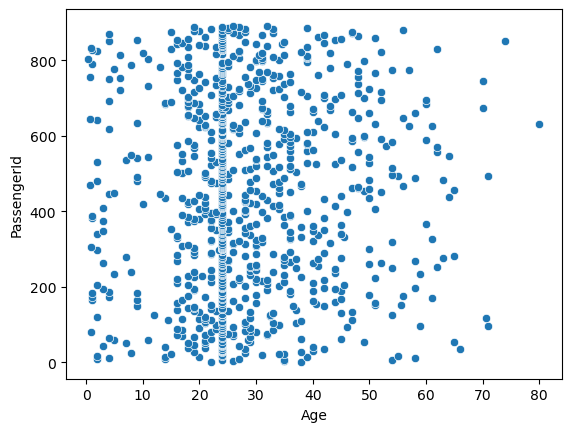

In [31]:
sns.scatterplot(x="Age", y="PassengerId", data=df)

<Axes: xlabel='Age', ylabel='PassengerId'>

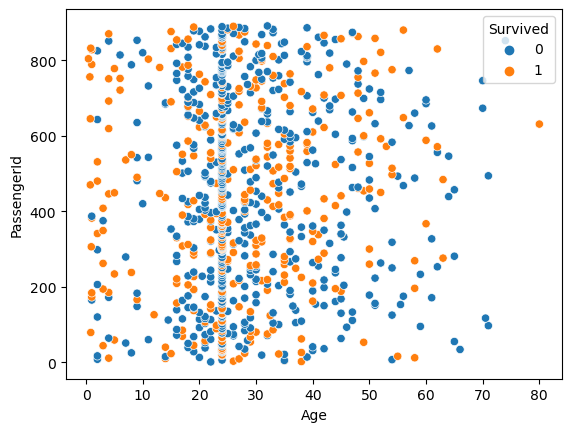

In [32]:
sns.scatterplot(x="Age", y="PassengerId", hue="Survived", data=df)

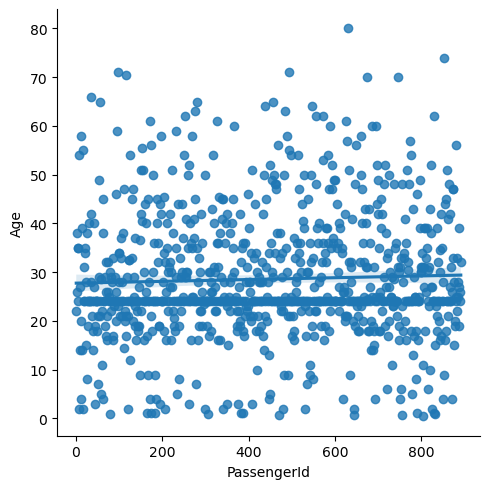

In [33]:
sns.lmplot(x="PassengerId", y="Age", data=df)
#doğrusal ilişki varmı yokmu

<Axes: >

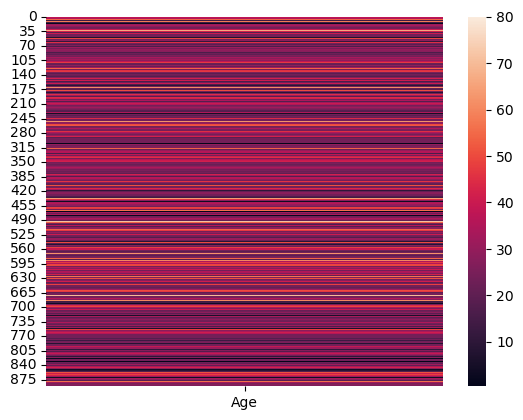

In [34]:
sns.heatmap(df[["Age"]])

<Axes: >

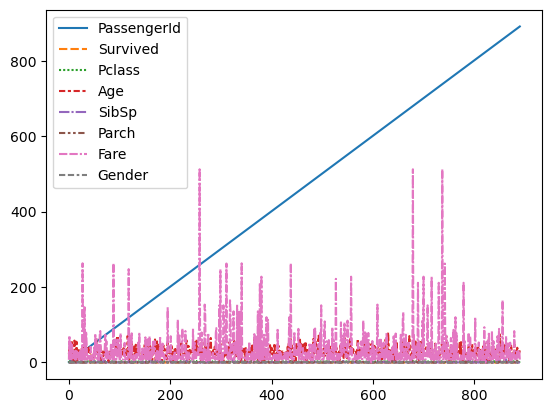

In [35]:
sns.lineplot(df)

In [36]:
df_age = df["Age"]

<Axes: >

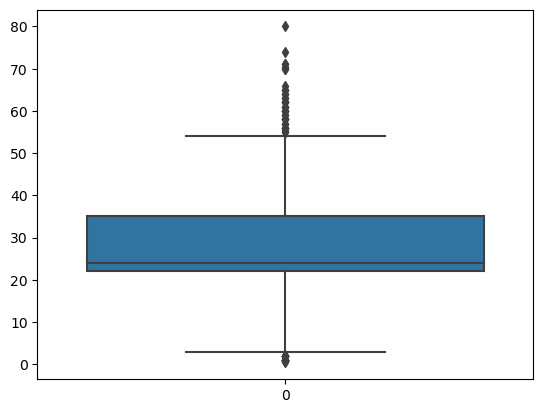

In [37]:
sns.boxplot(df_age)

In [38]:
Q1 = df_age.quantile(0.25)
Q3 = df_age.quantile(0.75)
IQR = Q3-Q1

In [39]:
Q1

22.0

In [40]:
Q3

35.0

In [41]:
IQR

13.0

In [42]:
alt_sinir = Q1-(1.5)*IQR
ust_sinir = Q3+(1.5)*IQR

In [43]:
alt_sinir

2.5

In [44]:
ust_sinir

54.5

In [45]:
(df_age<alt_sinir) | (df_age>ust_sinir)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [46]:
aykiri_age = (df_age<alt_sinir) | (df_age>ust_sinir)
aykiri_age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [47]:
df_age[aykiri_age]

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64

In [48]:
df_age.shape

(891,)

In [49]:
aykiri_age_alt = (df_age<alt_sinir)
aykiri_age_ust = (df_age>ust_sinir)

In [53]:
df_age[aykiri_age_alt]

7      2.5
16     2.5
78     2.5
119    2.5
164    2.5
172    2.5
183    2.5
205    2.5
297    2.5
305    2.5
340    2.5
381    2.5
386    2.5
469    2.5
479    2.5
530    2.5
642    2.5
644    2.5
755    2.5
788    2.5
803    2.5
824    2.5
827    2.5
831    2.5
Name: Age, dtype: float64

In [54]:
df_age[aykiri_age_ust]

11     54.5
15     54.5
33     54.5
54     54.5
94     54.5
96     54.5
116    54.5
152    54.5
170    54.5
174    54.5
195    54.5
232    54.5
252    54.5
268    54.5
275    54.5
280    54.5
326    54.5
366    54.5
438    54.5
456    54.5
467    54.5
483    54.5
487    54.5
492    54.5
493    54.5
545    54.5
555    54.5
570    54.5
587    54.5
625    54.5
626    54.5
630    54.5
647    54.5
659    54.5
672    54.5
684    54.5
694    54.5
745    54.5
772    54.5
829    54.5
851    54.5
879    54.5
Name: Age, dtype: float64

In [52]:
#aykırı değerleri baskılama yöntemi ile değiştirme
df_age[aykiri_age_alt] = alt_sinir
df_age[aykiri_age_ust] = ust_sinir

C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\4040008618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[aykiri_age_alt] = alt_sinir
C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\4040008618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[aykiri_age_ust] = ust_sinir


In [55]:
kat_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
lbe.fit_transform(df["Embarked"])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [57]:
df["new_Embarked"]=lbe.fit_transform(df["Embarked"])

In [58]:
lbe.fit_transform(df["Cabin"])

array([ 47,  81,  47,  55,  47,  47, 129,  47,  47,  47, 145,  49,  47,
        47,  47,  47,  47,  47,  47,  47,  47, 111,  47,  13,  47,  47,
        47,  63,  47,  47,  47,  41,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
       101,  47,  23,  71,  47,  47,  47,  47,  47,  21,  80,  47,  47,
        47, 142,  47,  47,  47,  47,  47,  47,  47,  47, 140,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  63,  47,  47,
        47, 122,  47,  47,  47,  12,  91,  47,  47,  47,  47,  98,  47,
        47,  47,  47,  47,  47,  47,  52,  47,  47,  47,  47,  47,  47,
        47,  36,  47,  47,  47,  47, 116,  98,  47,  47,  47, 138,  47,
        47,  47,  47,  47,  47,  47, 107,  55,  47,  45,  47,  47,  47,
        47,  47,  47,  47,  47, 141,  47,  47,  61,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47, 123,  47,  47,
        47,  18,  47,  47,  47,  14,  47,  47,  69,  47,  47,  4

In [59]:
df["new_Cabin"]=lbe.fit_transform(df["Cabin"])

In [60]:
kat_df["Cabin"].value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [61]:
kat_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [62]:
lbe.fit_transform(df["Ticket"])

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 395, 329,
       179,  95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302,
       186, 507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522,
       587, 239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601,
       189, 553, 623, 248, 270, 557, 566, 621, 204,  80, 347, 355, 473,
       158, 432, 304, 311, 280,  25, 637, 247, 676, 652,  95, 297, 298,
       341, 678, 548, 428, 475, 607, 612, 117, 150, 384, 361, 417, 505,
       245, 354, 296, 254, 388, 469,   2, 193, 274, 491, 176, 666, 460,
        53, 585, 333, 621, 540, 132, 219, 417, 186, 463, 541, 196, 318,
       380, 640, 537, 111, 552, 630,  55,  49, 504, 592, 203, 332, 668,
       438, 118, 558, 405, 676, 113, 147, 622,  36, 516, 538, 573, 595,
       418, 654, 258, 568, 470, 559, 323, 265, 249, 423,  28, 337, 576,
        80,   5, 480, 344, 659,  90, 412, 488, 593, 169, 574, 56

In [63]:
df["new_Ticket"]=lbe.fit_transform(df["Ticket"])

In [64]:
int_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare", "new_Cabin", "new_Embarked", "Gender", "new_Ticket", "Survived"]
selected_data = df[int_columns]

In [65]:
y = selected_data["Survived"]
X = selected_data.drop(["Survived"], axis=1)

In [70]:
print(X.head())

   Pclass  Age  SibSp  Parch  Fare  new_Cabin  new_Embarked  Gender  \
0       3   22      1      0     7         47             2       1   
1       1   38      1      0    71         81             0       0   
2       3   26      0      0     7         47             2       0   
3       1   35      1      0    53         55             2       0   
4       3   35      0      0     8         47             2       1   

   new_Ticket  
0         523  
1         596  
2         669  
3          49  
4         472  


In [71]:
print(X.shape)
print(y.shape)

(891, 9)
(891,)


In [72]:
print(X.dtypes)

Pclass          int64
Age             int64
SibSp           int64
Parch           int64
Fare            int64
new_Cabin       int64
new_Embarked    int64
Gender          int64
new_Ticket      int64
dtype: object


In [69]:
X['Age'] = X['Age'].astype('int64')
X['Fare'] = X['Fare'].astype('int64')
X['new_Cabin'] = X['new_Cabin'].astype('int64')
X['new_Embarked'] = X['new_Embarked'].astype('int64')
X['Gender'] = X['Gender'].astype('int64')
X['new_Ticket'] = X['new_Ticket'].astype('int64')

In [73]:
#lojistik regresyon
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.471995
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                  0.2912
Time:                        14:17:59   Log-Likelihood:                -420.55
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.024e-70
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Pclass          -0.0130      0.097     -0.134      0.894      -0.204       0.178
Age             -0.0040      0.007     -0.605      0.545      -0.017       0.009
SibSp           -0.2794      0.099     -2.810      0.005      -0.474      -0.085
Parch           -0.1193      0.112     -1.063      0.288      -0.339       0.101
Fare             0.0132      0.003      4.648      0.000       0.008       0.019
new_Cabin        0.0209      0.003      5.993      0.000       0.014       0.028
new_Embarked    -0.0299      0.110     -0.271      0.786      -0.246       0.186
Gender          -2.3742      0.185    -12.864      0.000      -2.736      -2.012
new_Ticket      -0.0008      0.000     -1.826      0.068      -0.002    6.16e-05
================================================================================
"""

In [74]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [75]:
loj_model.intercept_ #sabit değer alma

array([3.30130115])

In [76]:
loj_model.coef_ #bağımsız değişkenlerin katsayı değerleri

array([[-6.76240461e-01, -2.89344732e-02, -2.93740797e-01,
        -8.87095586e-02,  5.17644408e-03,  1.17158338e-02,
        -1.73099018e-01, -2.48576668e+00, -8.70663739e-04]])

In [77]:
y_pred = loj_model.predict(X)

In [78]:
confusion_matrix(y, y_pred)

array([[478,  71],
       [103, 239]], dtype=int64)

In [79]:
accuracy_score(y, y_pred) #doğru sınıflandırma oranı

0.8047138047138047

In [80]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [81]:
loj_model.predict(X)[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [82]:
loj_model.predict_proba(X)[0:10] #soldaki sınıf 0'a ait sınıfı, sağ taraf 1'e ait sınıfı veriyor

array([[0.9135808 , 0.0864192 ],
       [0.11615005, 0.88384995],
       [0.45549542, 0.54450458],
       [0.13605203, 0.86394797],
       [0.91613759, 0.08386241],
       [0.84916796, 0.15083204],
       [0.51700114, 0.48299886],
       [0.90651008, 0.09348992],
       [0.43148165, 0.56851835],
       [0.13693227, 0.86306773]])

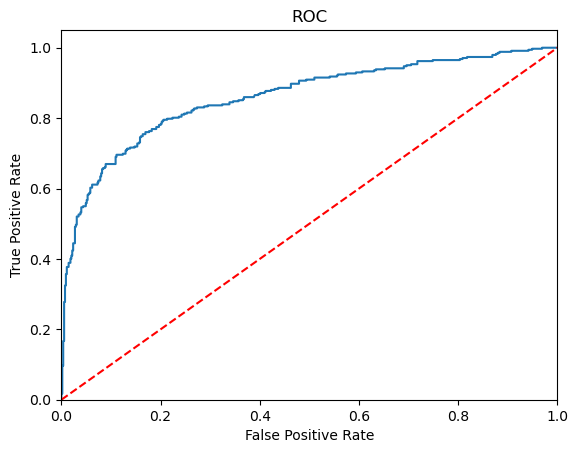

In [83]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40) #20, 40

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 9)
(712,)
(179, 9)
(179,)


In [86]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [87]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8491620111731844

In [88]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean() #1-log res modelini kullanmak istyiorum, 2-neleri kullancam, 3-neyle karşılaştırıcam, 4-kaç kere

0.803921568627451

In [89]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [90]:
nb_model.predict(X_test)[0:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [91]:
nb_model.predict_proba(X_test)[0:10]

array([[5.95886232e-01, 4.04113768e-01],
       [9.60702694e-01, 3.92973055e-02],
       [3.54999974e-01, 6.45000026e-01],
       [9.99987114e-01, 1.28857558e-05],
       [4.84641668e-01, 5.15358332e-01],
       [9.51867635e-01, 4.81323654e-02],
       [9.81080782e-01, 1.89192176e-02],
       [9.82734484e-01, 1.72655165e-02],
       [9.48519514e-01, 5.14804864e-02],
       [5.65632398e-03, 9.94343676e-01]])

In [92]:
nb_model.score(X_test, y_test) #kısa yol

0.7932960893854749

In [93]:
y_pred = nb_model.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred)

0.7932960893854749

In [95]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean() #1-nb modelini kullanmak istyiorum, 2-neleri kullancam, 3-neyle karşılaştırıcam, 4-kaç kere

0.7477124183006535

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       103
           1       0.77      0.72      0.75        76

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [97]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [98]:
knn_model.score(X_test, y_test)

0.7094972067039106

In [99]:
y_pred = knn_model.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred)

0.7094972067039106

In [101]:
cross_val_score(knn_model, X_test, y_test, cv=10).mean()

0.6872549019607843

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       103
           1       0.71      0.53      0.61        76

    accuracy                           0.71       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.71      0.70       179



In [105]:
knn_params = {"n_neighbors" : np.arange(1,50)}

In [104]:
knn_params = {'n_neighbors': [2, 5, 10, 100],
                   'weights': ["uniform", "distance"],
                   'algorithm': ["ball_tree", "kd_tree", "brute"],
                   'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                   'p': [1, 2]}

In [106]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [107]:
print("Best score: " + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score: 0.7105242566510171
Best parameters: {'n_neighbors': 10}


In [108]:
knn = KNeighborsClassifier(10)
knn_tuned = knn.fit(X_train, y_train)

In [109]:
knn_tuned.score(X_test, y_test)

0.7262569832402235

In [110]:
y_pred = knn_tuned.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred)

0.7262569832402235

In [112]:
svc = SVC()
svc = svc.fit(X_train, y_train)
svc

SVC()

In [113]:
y_pred = svc.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.664804469273743

In [115]:
svc.score(X_test, y_test)

0.664804469273743

In [116]:
svc_params = {"C": np.arange(1,10),
             "kernel": ["linear", "rbf"]}

In [117]:
svc = SVC()

In [118]:
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)

In [119]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [120]:
print("Best score: " + str(svc_cv_model.best_score_))
print("Best parameters: " + str(svc_cv_model.best_params_))

Best score: 0.7823552425665101
Best parameters: {'C': 1, 'kernel': 'linear'}


In [121]:
svc_tuned = SVC(kernel = "linear",
         C = 1)

In [122]:
svc_tuned.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [123]:
y_pred = svc_tuned.predict(X_test)

In [124]:
accuracy_score(y_test, y_pred)

0.8044692737430168

In [125]:
svc_tuned.score(X_test, y_test)

0.8044692737430168

In [126]:
scaler = StandardScaler() #ölçeklendirme ve normalize işlemi

In [127]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
mlp = MLPClassifier().fit(X_train_scaled, y_train)

C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
y_pred = mlp.predict(X_test_scaled)

In [130]:
accuracy_score(y_test, y_pred)

0.8324022346368715

In [136]:
?mlp

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\zeeyn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defa

In [131]:
mlp_params = {'learning_rate': ["constant", "invscaling", "adaptive"],
              'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              'solver': ["lbfgs", "adam", "sgd"],
                   'hidden_layer_sizes': [(10, 5), (15, 10), (20, 15), (100,), (100, 50, 25)],
                   'activation': ["logistic", "relu", "tanh"]}

In [132]:
mlp = MLPClassifier()

In [133]:
mlp_cv_model = GridSearchCV(mlp, mlp_params, cv=10, n_jobs=-1, verbose=2)

In [134]:
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 5), (15, 10), (20, 15),
                                                (100,), (100, 50, 25)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [135]:
print("Best score: " + str(mlp_cv_model.best_score_))
print("Best parameters: " + str(mlp_cv_model.best_params_))

Best score: 0.7823748043818466
Best parameters: {'activation': 'logistic', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [140]:
mlp_tuned = MLPClassifier(activation = "logistic",
                         alpha = 0.02,
                         hidden_layer_sizes = (100, 50, 25),
                         learning_rate = "invscaling",
                         solver = "adam")

In [141]:
mlp_tuned.fit(X_train, y_train)

C:\Users\zeeyn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.02,
              hidden_layer_sizes=(100, 50, 25), learning_rate='invscaling')

In [142]:
y_pred = mlp_tuned.predict(X_test)

In [143]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [145]:
rf = RandomForestClassifier()

In [146]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
y_pred = rf.predict(X_test)

In [148]:
accuracy_score(y_test, y_pred)

0.8715083798882681

In [150]:
?rf

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\zeeyn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and 

In [156]:
rf_params = {'n_estimators': [10, 50, 100],
                   'criterion': ["gini", "entropy", "log_loss"],
                   'max_features': ["sqrt", "log2"],
            'max_depth': [2, 5, 8, 10]}

In [157]:
rf = RandomForestClassifier()

In [158]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2)

In [159]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [160]:
print("Best score: " + str(rf_cv_model.best_score_))
print("Best parameters: " + str(rf_cv_model.best_params_))

Best score: 0.8511150234741784
Best parameters: {'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}


In [162]:
rf_tuned = RandomForestClassifier(criterion = 'log_loss',
                                 max_depth = 8,
                                 max_features = 'sqrt',
                                 n_estimators = 10)

In [163]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=8, n_estimators=10)

In [164]:
y_pred = rf_tuned.predict(X_test)

In [165]:
accuracy_score(y_test, y_pred)

0.8379888268156425

In [167]:
Importance = pd.DataFrame({'Importance' : rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Degisken Onlem Duzeyleri')

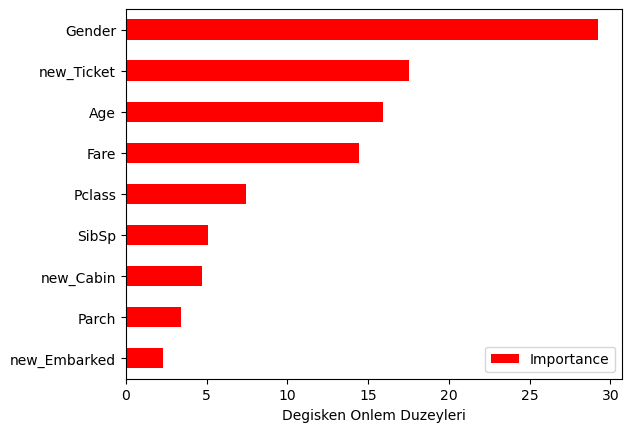

In [169]:
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel("Degisken Onlem Duzeyleri")

In [199]:
gbm = GradientBoostingClassifier()

In [200]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [201]:
y_pred = gbm.predict(X_test)

In [202]:
accuracy_score(y_test, y_pred)

0.8547486033519553

In [203]:
gbm_params = {'loss': ["log_loss", "deviance", "exponential"],
            'criterion': ["friedman_mse", "squared_error"],
              'learning_rate': [0.001, 0.01, 0.1, 0.05],
              'n_estimators': [100, 500, 100],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]
           }

In [204]:
gbm = GradientBoostingClassifier()

In [205]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [206]:
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [207]:
print("Best score: " + str(gbm_cv_model.best_score_))
print("Best parameters: " + str(gbm_cv_model.best_params_))

Best score: 0.8511737089201878
Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [208]:
gbm_tuned = GradientBoostingClassifier(criterion = 'squared_error',
                                      learning_rate = 0.05,
                                      loss = 'exponential',
                                      max_depth = 5,
                                      min_samples_split = 2,
                                      n_estimators = 100)

In [209]:
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           loss='exponential', max_depth=5)

In [210]:
y_pred = gbm_tuned.predict(X_test)

In [211]:
accuracy_score(y_test, y_pred)

0.8659217877094972

In [212]:
xgb = XGBClassifier()

In [213]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [214]:
y_pred = xgb.predict(X_test)

In [215]:
accuracy_score(y_test, y_pred)

0.8379888268156425

In [220]:
xgb_params = {'num_leaves':[20,40,60,80,100],
              'min_child_samples':[5,10,15],
              'max_depth':[3,4,5,6],
              'learning_rate':[0.05,0.1,0.02, 0.01],
              'reg_alpha':[0,0.01,0.03],
             'n_estimators': [100, 500, 1000, 2000],
             'subsample': [0.6, 0.8, 1.0],
             'min_samples_split': [2, 5, 10]}

In [221]:
xgb = XGBClassifier()

In [222]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)

In [223]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\zeeyn\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [18:23:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1, param_grid={'num_leaves': [20, 40, 60, 80, 100]},
             verbose=2)

In [ ]:
print("Best score: " + str(xgb_cv_model.best_score_))
print("Best parameters: " + str(xgb_cv_model.best_params_))

In [224]:
#lightboost, catboost, adaboost

In [235]:
models = [
    nb_model,
    loj_model,
    knn_tuned,
    svc_tuned,
    mlp_tuned,
    rf_tuned,
    gbm_tuned]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":")
    print("Accuracy: {:.4%}".format(accuracy))
    
    

----------------------------
GaussianNB:
Accuracy: 79.3296%
----------------------------
LogisticRegression:
Accuracy: 84.9162%
----------------------------
KNeighborsClassifier:
Accuracy: 72.6257%
----------------------------
SVC:
Accuracy: 80.4469%
----------------------------
MLPClassifier:
Accuracy: 81.5642%
----------------------------
RandomForestClassifier:
Accuracy: 83.7989%
----------------------------
GradientBoostingClassifier:
Accuracy: 86.5922%


C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\819497524.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\819497524.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\819497524.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\819497524.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\zeeyn\AppData\Local\Temp\ipykernel_3308\819497524.py:9:

Text(0.5, 1.0, 'Accuracy Ratios for Models')

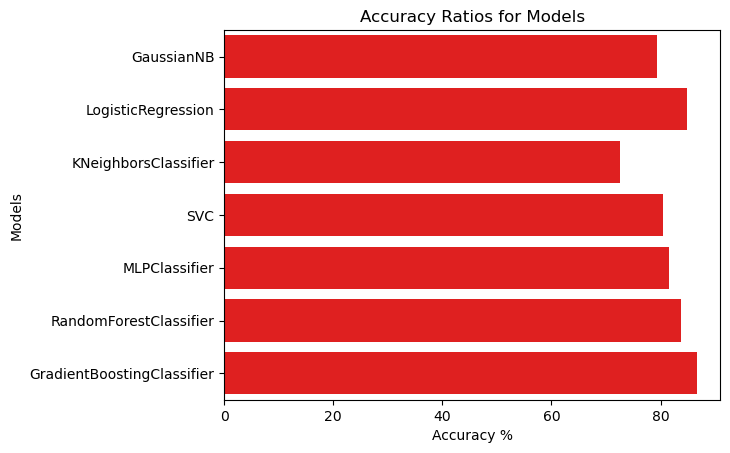

In [236]:
sonuc = []
sonuclar = pd.DataFrame(columns = ["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[names, accuracy*100]], columns = ["Models", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
sns.barplot(x= "Accuracy", y = "Models", data=sonuclar, color = "r")
plt.xlabel("Accuracy %")
plt.title("Accuracy Ratios for Models")